# 20133807 Jeong Seong Woon

In [158]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os
import numpy as np
import matplotlib.pyplot as plt

In [159]:
transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor(),])

In [198]:
train_data_path = './horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=False, num_workers=1)
validation_data_path = './horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=10, shuffle=False, num_workers=1)

In [199]:
train_data = []
train_label = []
val_data = []
val_label = []

for i, data in enumerate(trainloader):
    inputs, labels = data
    train_data_batch = []
    for j in range(len(inputs)):        
        image_temp = inputs[j][0].numpy()
        image = []
        for k in range(len(image_temp)):
            image_column = image_temp[:,k]
            image_column = image_column.reshape((100,1))
            if k==0:
                image = image_column
            else:
                image = np.vstack((image,image_column))
        image = np.vstack((image, np.ones(1)))
        if j == 0:
            train_data_batch = image
        else:
            train_data_batch = np.hstack((train_data_batch,image))
    if i == 0:
        train_data = train_data_batch
    else:
        train_data = np.hstack((train_data,train_data_batch))
    train_label = train_label+labels.tolist()
train_label = np.array(train_label)
train_label = train_label.reshape((len(train_label),1))

for i, data in enumerate(valloader):
    inputs, labels = data
    val_data_batch = []
    for j in range(len(inputs)):        
        image_temp = inputs[j][0].numpy()
        image = []
        for k in range(len(image_temp)):
            image_column = image_temp[:,k]
            image_column = image_column.reshape((100,1))
            if k==0:
                image = image_column
            else:
                image = np.vstack((image,image_column))
        image = np.vstack((image, np.ones(1)))
        if j == 0:
            val_data_batch = image
        else:
            val_data_batch = np.hstack((val_data_batch,image))
    if i == 0:
        val_data = val_data_batch
    else:
        val_data = np.hstack((val_data,val_data_batch))
    val_label = val_label+labels.tolist()
val_label = np.array(val_label)
val_label = val_label.reshape((len(val_label),1))
print(val_label.shape)

(256, 1)


In [201]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [202]:
def lossFunc(w, X, Y):
    m = len(Y)
    result = (-1/m)*np.sum(Y*np.log(sigmoid(np.dot(X.T,w))) + (1-Y)*np.log(1-sigmoid(np.dot(X.T,w))))
    return result

In [203]:
def accuracy(X,w):
    return sigmoid(np.dot(X.T,w)) >= 0.5

In [204]:
import time

In [222]:
loss_list_train = []
loss_list_val = []
accuracy_list_train = []
accuracy_list_val = []
time_list = []
w = np.zeros((10001,1))
def gradientDescent(X, Y, w, l_rate):
    m = len(Y)
    iterations = 0
    old_train = lossFunc(w, train_data, train_label)
    old_val = lossFunc(w, val_data, val_label)
    accuracy_train = (accuracy(train_data,w) == train_label).sum() / len(train_label)
    accuracy_val = (accuracy(val_data,w) == val_label).sum() / len(val_label)
    while(True):
        iterations+=1
        loss_list_train.append(old_train)
        loss_list_val.append(old_val)
        print(old_train)
        accuracy_list_train.append(accuracy_train)
        accuracy_list_val.append(accuracy_val)
        tic = time.time()
        w = w - (l_rate/m)*np.dot(X, sigmoid(np.dot(X.T,w))-Y)
        toc = time.time()
        time_list.append((toc-tic)*1000)
        current_train = lossFunc(w, train_data, train_label)
        old_val = lossFunc(w, val_data, val_label)
        accuracy_train = (accuracy(train_data,w) == train_label).sum() / len(train_label)
        accuracy_val = (accuracy(val_data,w) == val_label).sum() / len(val_label)
        if abs(old_train-current_train)< 1e-4:
            break
        else:
            old_train = current_train

In [223]:
gradientDescent(train_data, train_label, w, 0.01)

0.6931471805599453
0.8277710403927193
3.0880864668506103
4.051224783348099
1.7712834294908797
4.70368382403266
1.0255770879312767
4.070295366471929
1.587266737130683
4.600690892264516
0.9858346066604387
3.887517455250703
1.6325796526435852
4.473645955270487
0.9796193469372385
3.727310557722385
1.6590080435731578
4.328644210000058
0.9976290830869246
3.591863170621541
1.6616501430395156
4.171672423154611
1.0317027380635346
3.472806457724489
1.6483235666709288
4.003201356451194
1.0789747012492323
3.369003883792262
1.6203215261208692
3.8221340250779443
1.1382243060542987
3.279259210418276
1.5804749448464688
3.6290676669963906
1.207185423408716
3.198846144202826
1.535777902851261
3.4301070818663013
1.2796908288828115
3.11874148212902
1.4962253626442474
3.23739338460325
1.3455727231182242
3.0299167493719765
1.4696750563559795
3.0627530313585933
1.3957993908958644
2.9292829131334415
1.4571520964990803
2.91035365549103
1.4276859883961943
2.8201618926736396
1.4536716063743418
2.776727390847427


0.5365559436777717
0.46718391571809326
0.5340617739580267
0.46541462618243123
0.5315905760692133
0.46366784753878865
0.5291701506996035
0.4619621641347122
0.526831017949212
0.4603178040442826
0.5246058405282821
0.45875624198806186
0.5225287447028312
0.45729973071529334
0.5206345459887193
0.45597076324375585
0.5189578830249522
0.45479146612325316
0.5175322572474788
0.45378292049137914
0.5163889682597411
0.45296440342478206
0.5155559258822258
0.4523525375495496
0.5150563110080302
0.45196033302995925
0.5149070505077857
0.45179610433260337
0.5151170692461159
0.4518622465100912
0.5156852884676218
0.45215386463170576
0.5165983589991894
0.45265726824329383
0.5178281551444772
0.4533483731391856
0.5193291158001893
0.45419109711731226
0.521035606121485
0.45513589424261797
0.5228595839298112
0.45611863865007235
0.524688979071269
0.4570601330228814
0.5263873076543089
0.45786656039140117
0.5277951093588491
0.458431197252035
0.5287337685109811
0.45863763821976317
0.529012116007521
0.4583646352632976

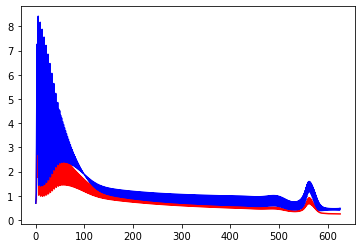

In [224]:
plt.plot(loss_list_train, 'r')
plt.plot(loss_list_val,'b')

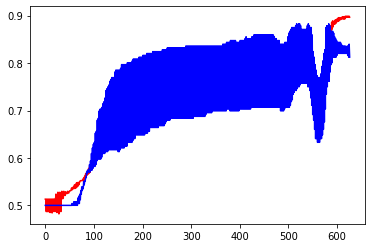

In [225]:
plt.plot(accuracy_list_train, 'r')
plt.plot(accuracy_list_val,'b')

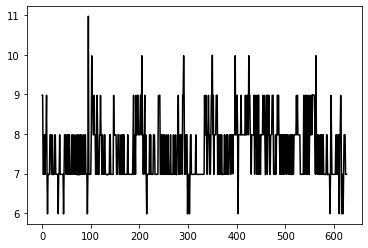

In [226]:
plt.plot(time_list, c='black')